# **Desarrollo Evaluación N° 1 Minería de Datos**

### Integrantes:

* Rolando Alacid
* Aníbal Madrid
* Andrés Villanueva  



#### Para realizar el análisis de regresión lineal múltiple escogimos el dataset titulado:
**"Estimación de los niveles de obesidad en función de los hábitos alimentarios y la condición física."**

In [1]:
# Importamos las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Indicamos la ruta donde se encuentra el dataset
url = 'https://archive.ics.uci.edu/static/public/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition.zip'

In [3]:
# Cargamos el dataframe
obesity = pd.read_csv(url)
obesity

Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0      no   2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1      no   3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2      no   2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3      no   3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4      no   2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...   ...   ...  ...        ...   ...       ...  ...       ...       ...   
2106  yes   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS           NObeyesdad  
0             no  Public_Transportation        Normal_Weight  
1      Sometimes  Public_Transportation        Normal_Weight  
2     Frequently  Public_Transportation        Normal_Weight  
3     Frequently                Walking   Overweight_Level_I  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  
2107   Sometimes  Public_Transportation     Obesity_Type_III  
2108   Sometimes  Public_Transportation     Obesity_Type_III  
2109   Sometimes  Public_Transportation     Obesity_Type_III  
2110   Sometimes  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

#### Como se observa, existen columnas con siglas o abreviaciones que encontramos en la web https://www.analyticslane.com/2019/05/06/como-cambiar-el-nombre-de-las-columnas-en-pandas/, por lo que procedemos a cambiar los nombres de dichas columnas para un mayor contexto de las variables.

In [4]:
# Vemos el nombre original de las variables del dataframe.
obesity.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [5]:
# Cambiamos el nombre de las columnas con abreviaciones
obesity.columns = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'Frequent consumption of high caloric food', 'Frequency of consumption of vegetables',
      'Number of main meals', 'Consumption of food between meals', 'SMOKE', 'Consumption of water daily',
      'Calories consumption monitoring', 'Physical activity frequency', 'Time using technology devices',
       'Consumption of alcohol', 'Transportation used', 'NObeyesdad']
obesity.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'Frequent consumption of high caloric food',
       'Frequency of consumption of vegetables', 'Number of main meals',
       'Consumption of food between meals', 'SMOKE',
       'Consumption of water daily', 'Calories consumption monitoring',
       'Physical activity frequency', 'Time using technology devices',
       'Consumption of alcohol', 'Transportation used', 'NObeyesdad'],
      dtype='object')

In [6]:
# Vemos la estadística descriptiva de todas las variables numéricas del dataframe
obesity.describe()

Age       Height       Weight  \
count  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058   
std       6.345968     0.093305    26.191172   
min      14.000000     1.450000    39.000000   
25%      19.947192     1.630000    65.473343   
50%      22.777890     1.700499    83.000000   
75%      26.000000     1.768464   107.430682   
max      61.000000     1.980000   173.000000   

       Frequency of consumption of vegetables  Number of main meals  \
count                             2111.000000           2111.000000   
mean                                 2.419043              2.685628   
std                                  0.533927              0.778039   
min                                  1.000000              1.000000   
25%                                  2.000000              2.658738   
50%                                  2.385502              3.000000   
75%                                  3.000000              3.000000   
max                                  3.000000              4.000000   

       Consumption of water daily  Physical activity frequency  \
count                 2111.000000                  2111.000000   
mean                     2.008011                     1.010298   
std                      0.612953                     0.850592   
min                      1.000000                     0.000000   
25%                      1.584812                     0.124505   
50%                      2.000000                     1.000000   
75%                      2.477420                     1.666678   
max                      3.000000                     3.000000   

       Time using technology devices  
count                    2111.000000  
mean                        0.657866  
std                         0.608927  
min                         0.000000  
25%                         0.000000  
50%                         0.625350  
75%                         1.000000  
max                         2.000000

In [7]:
# Confirmamos si existen valores null y los tipos de datos en el dataframe
print(obesity.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Gender                                     2111 non-null   object 
 1   Age                                        2111 non-null   float64
 2   Height                                     2111 non-null   float64
 3   Weight                                     2111 non-null   float64
 4   family_history_with_overweight             2111 non-null   object 
 5   Frequent consumption of high caloric food  2111 non-null   object 
 6   Frequency of consumption of vegetables     2111 non-null   float64
 7   Number of main meals                       2111 non-null   float64
 8   Consumption of food between meals          2111 non-null   object 
 9   SMOKE                                      2111 non-null   object 
 10  Consumption of water dai

#### Según la información del dataframe, la variable ***NObeyesdad*** indica el nivel de obesidad según su índice de masa corporal (IMC) y está construido por la ecuación:
Mass Body Index = Weight/Height^2

Los rangos de IMC que tiene cada nivel de obesidad son:
* Underweight Less than 18.5
* Normal 18.5 to 24.9
* Overweight 25.0 to 29.9
* Obesity I 30.0 to 34.9
* Obesity II 35.0 to 39.9
* Obesity III Higher than 40

In [8]:
# Calculamos el IMC como Mass_Body_Index y agregamos al dataframe
obesity['Mass_Body_Index'] = round(obesity['Weight']/(obesity['Height']*obesity['Height']),2)

In [9]:
# Vemos la cantidad de personas por género y nivel de obesidad
obesity[['Gender','NObeyesdad']].value_counts()

Gender  NObeyesdad         
Female  Obesity_Type_III       323
Male    Obesity_Type_II        295
        Obesity_Type_I         195
        Overweight_Level_II    187
Female  Insufficient_Weight    173
        Obesity_Type_I         156
Male    Normal_Weight          146
Female  Overweight_Level_I     145
Male    Overweight_Level_I     145
Female  Normal_Weight          141
        Overweight_Level_II    103
Male    Insufficient_Weight     99
Female  Obesity_Type_II          2
Male    Obesity_Type_III         1
dtype: int64

### **Visualización y gráficos**

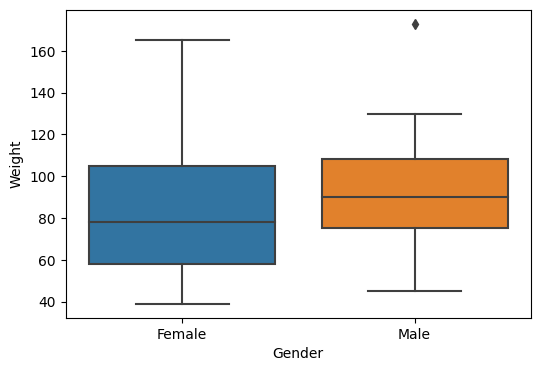

In [10]:
# Gráfico de cajas para visualizar el rango de altura de hombres y mujeres
f, ax = plt.subplots(figsize = (6,4))
fig = sns.boxplot(x = 'Gender', y = 'Weight', data = obesity)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Normal_Weight'),
  Text(1, 0, 'Overweight_Level_I'),
  Text(2, 0, 'Overweight_Level_II'),
  Text(3, 0, 'Obesity_Type_I'),
  Text(4, 0, 'Insufficient_Weight'),
  Text(5, 0, 'Obesity_Type_II'),
  Text(6, 0, 'Obesity_Type_III')])

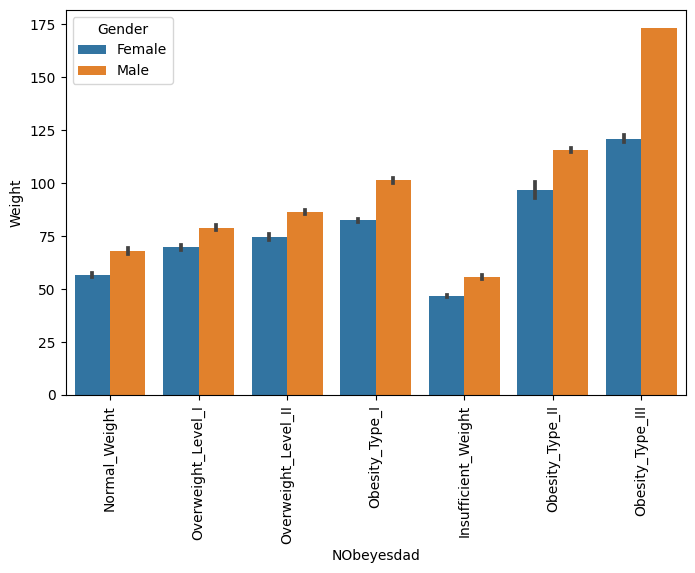

In [11]:
# Gráfico de barras para visualizar el peso (kg) según el nivel de obesidad por sexo
f, ax = plt.subplots(figsize = (8,5))
fig = sns.barplot(x = 'NObeyesdad', y = 'Weight', data = obesity, hue = 'Gender')
plt.xticks(rotation = 90)

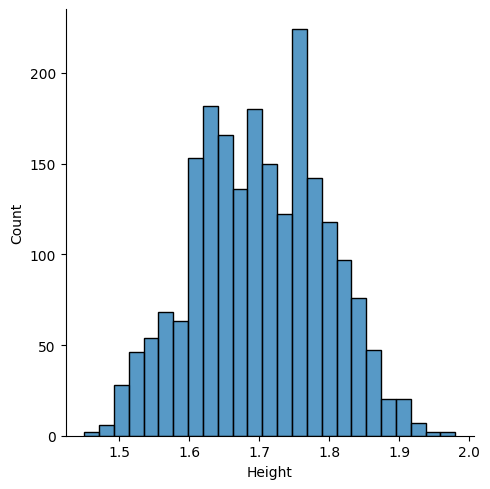

In [12]:
sns.displot(obesity['Height'])

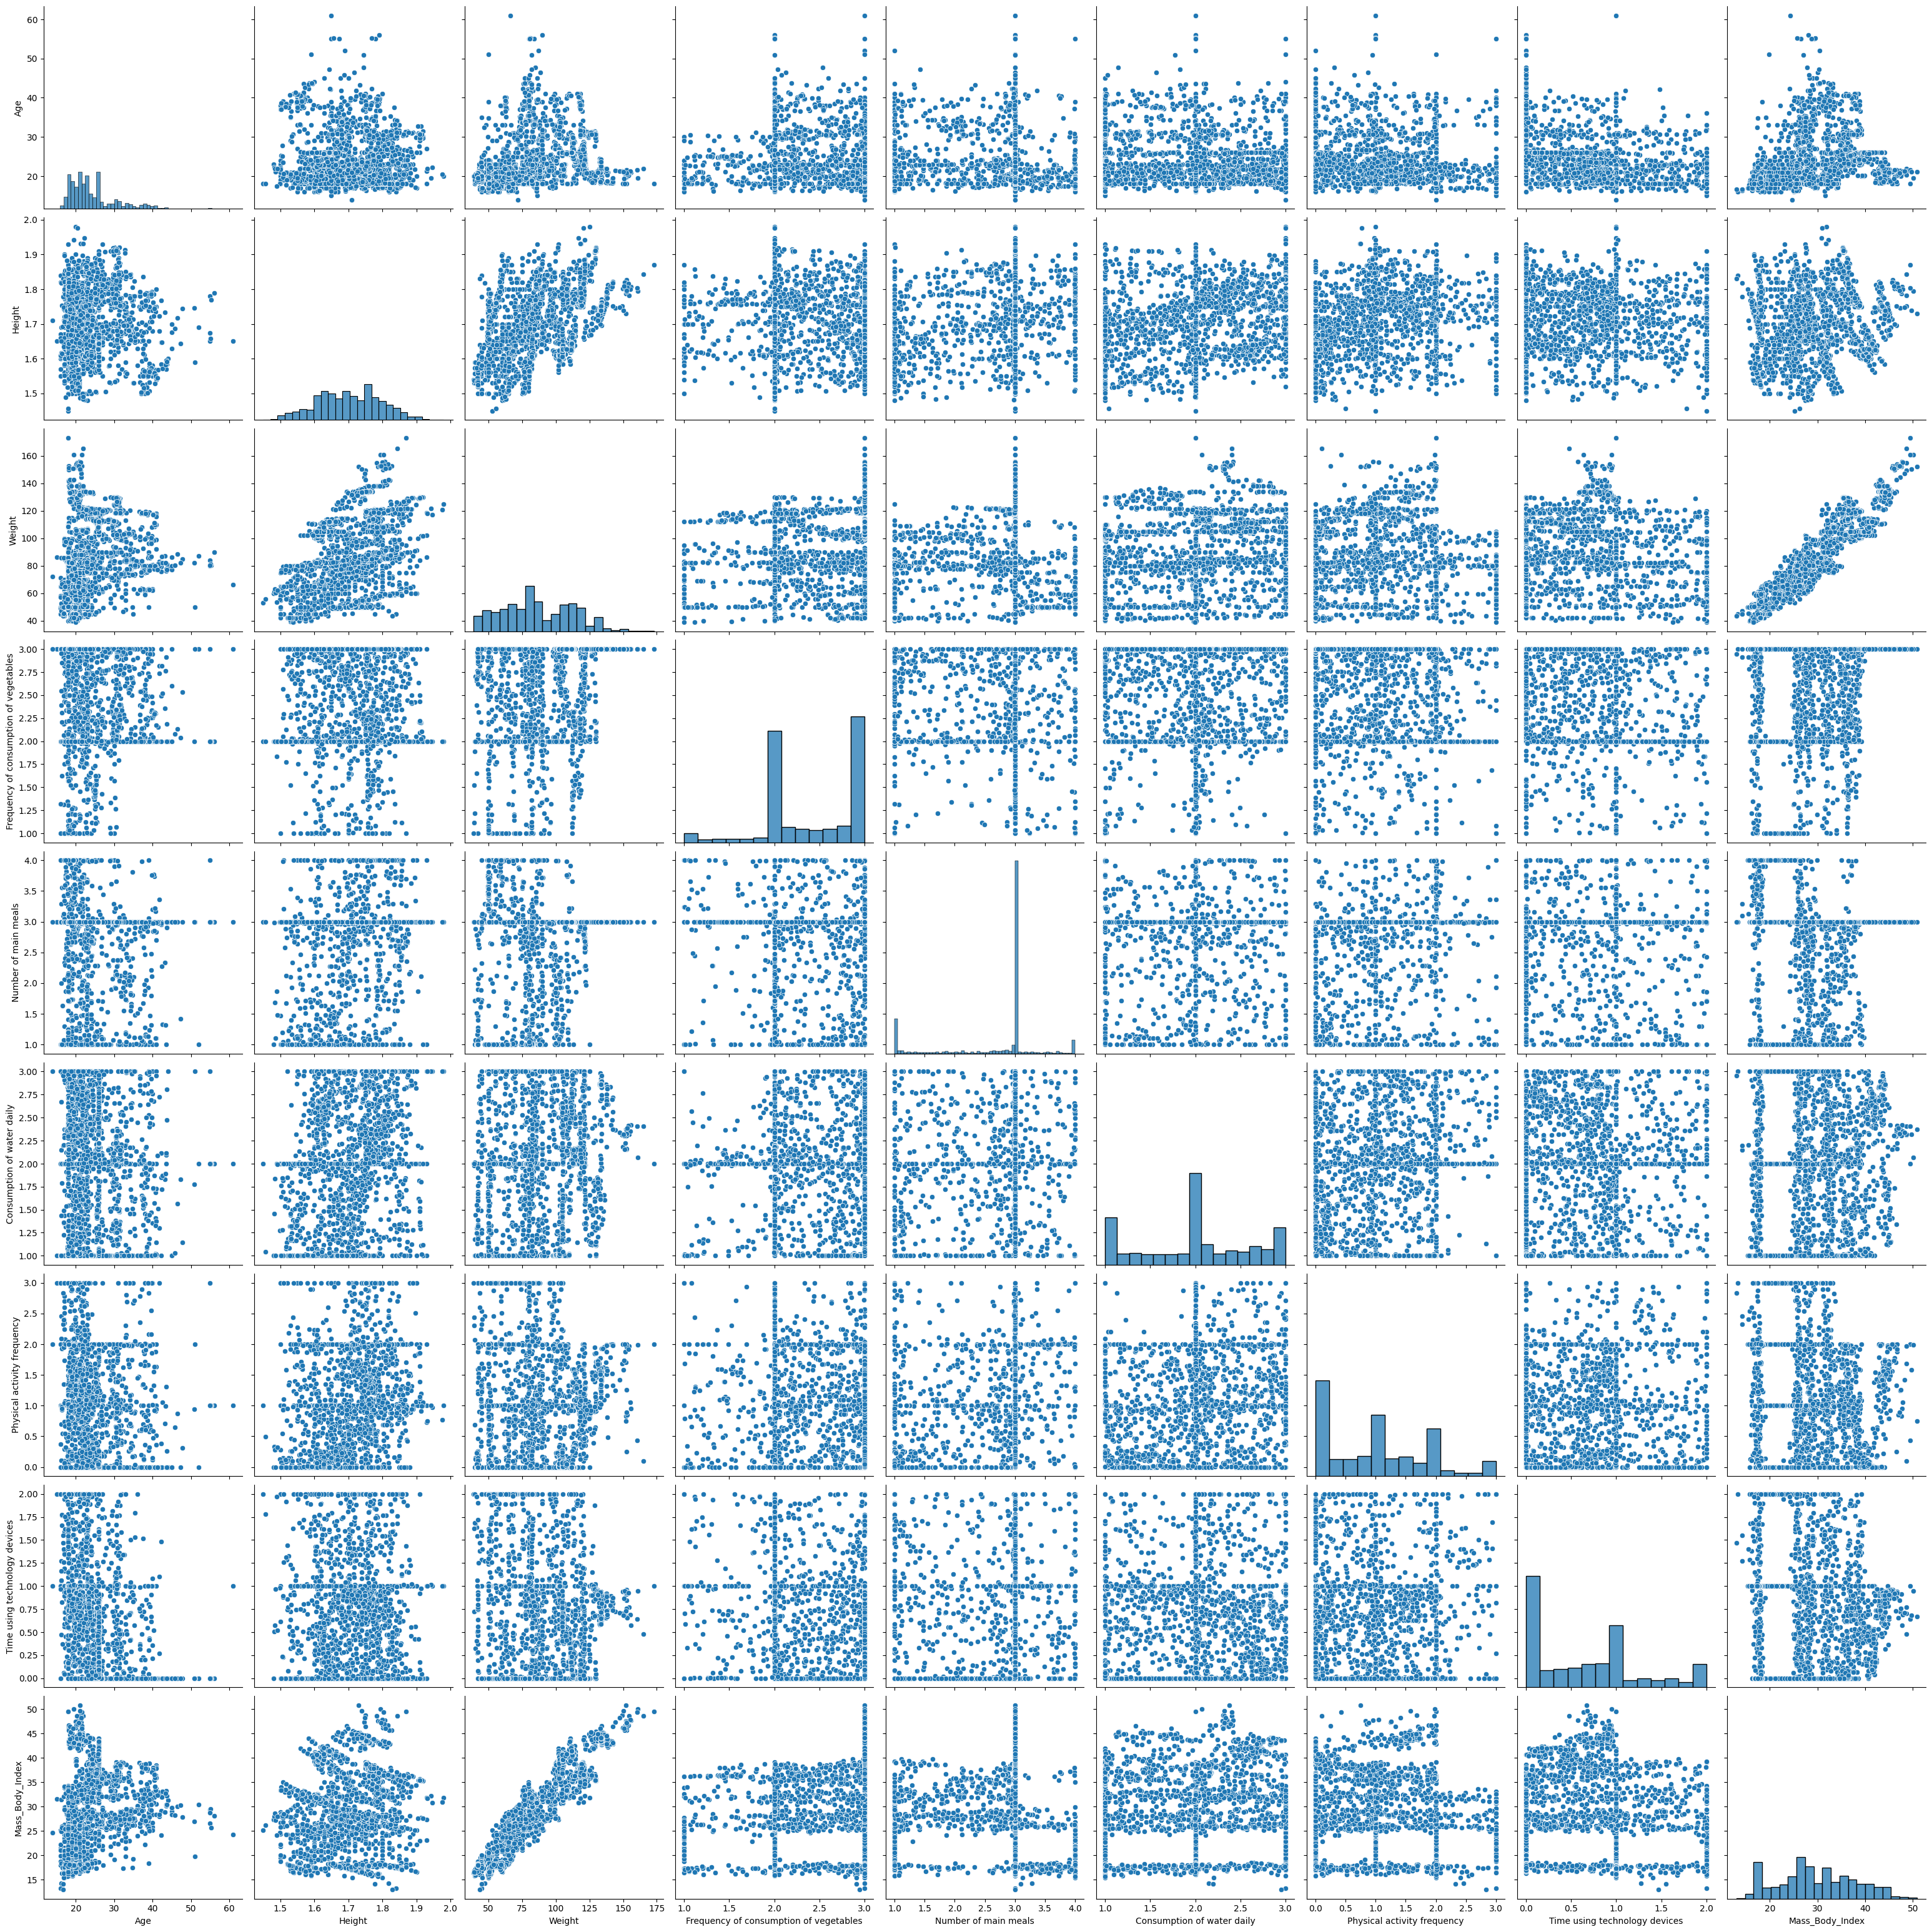

In [13]:
sns.pairplot(obesity, height = 3.5)
plt.show()

In [14]:
corrmat = obesity.corr()
corrmat

<ipython-input-14-9cfbb23fcef0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = obesity.corr()


Age    Height    Weight  \
Age                                     1.000000 -0.025958  0.202560   
Height                                 -0.025958  1.000000  0.463136   
Weight                                  0.202560  0.463136  1.000000   
Frequency of consumption of vegetables  0.016291 -0.038121  0.216125   
Number of main meals                   -0.043944  0.243672  0.107469   
Consumption of water daily             -0.045304  0.213376  0.200575   
Physical activity frequency            -0.144938  0.294709 -0.051436   
Time using technology devices          -0.296931  0.051912 -0.071561   
Mass_Body_Index                         0.244149  0.131788  0.934807   

                                        Frequency of consumption of vegetables  \
Age                                                                   0.016291   
Height                                                               -0.038121   
Weight                                                                0.216125   
Frequency of consumption of vegetables                                1.000000   
Number of main meals                                                  0.042216   
Consumption of water daily                                            0.068461   
Physical activity frequency                                           0.019939   
Time using technology devices                                        -0.101135   
Mass_Body_Index                                                       0.263649   

                                        Number of main meals  \
Age                                                -0.043944   
Height                                              0.243672   
Weight                                              0.107469   
Frequency of consumption of vegetables              0.042216   
Number of main meals                                1.000000   
Consumption of water daily                          0.057088   
Physical activity frequency                         0.129504   
Time using technology devices                       0.036326   
Mass_Body_Index                                     0.039970   

                                        Consumption of water daily  \
Age                                                      -0.045304   
Height                                                    0.213376   
Weight                                                    0.200575   
Frequency of consumption of vegetables                    0.068461   
Number of main meals                                      0.057088   
Consumption of water daily                                1.000000   
Physical activity frequency                               0.167236   
Time using technology devices                             0.011965   
Mass_Body_Index                                           0.144187   

                                        Physical activity frequency  \
Age                                                       -0.144938   
Height                                                     0.294709   
Weight                                                    -0.051436   
Frequency of consumption of vegetables                     0.019939   
Number of main meals                                       0.129504   
Consumption of water daily                                 0.167236   
Physical activity frequency                                1.000000   
Time using technology devices                              0.058562   
Mass_Body_Index                                           -0.177528   

                                        Time using technology devices  \
Age                                                         -0.296931   
Height                                                       0.051912   
Weight                                                      -0.071561   
Frequency of consumption of vegetables                      -0.101135   
Number of main meals                                         0.036326   
Consumption 

<Axes: >

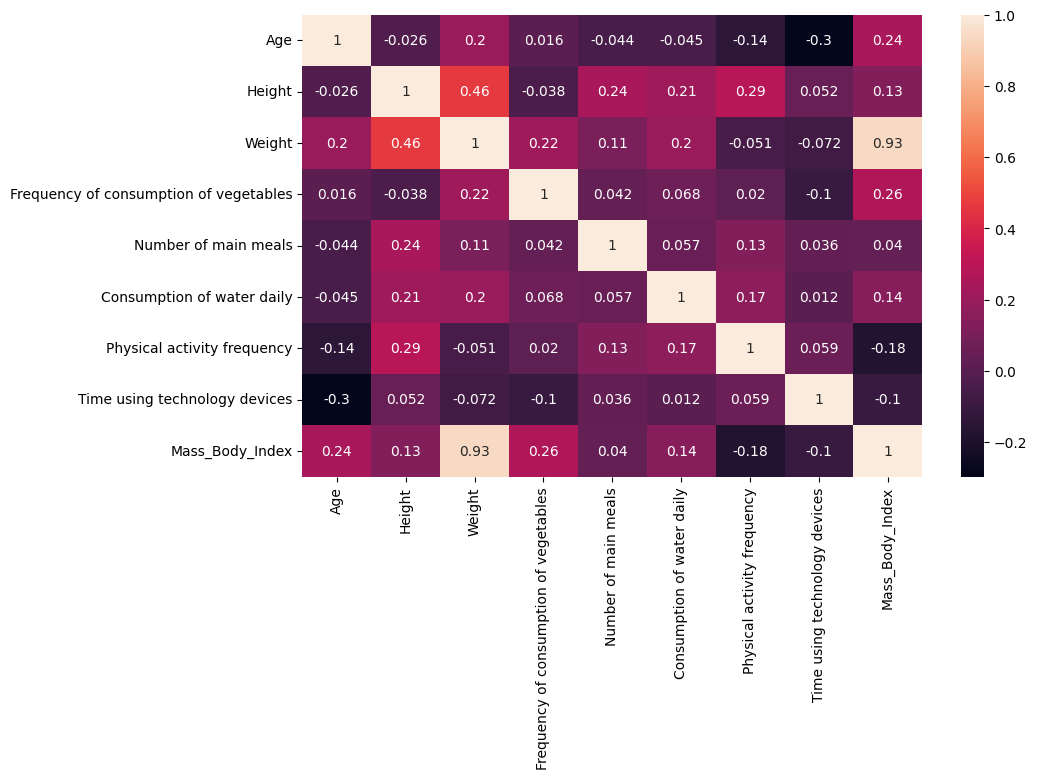

In [15]:
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corrmat, annot = True)

#### Dado que el estudio busca estimar los niveles de obesidad en función de los hábitos alimentarios y la condición física de los encuestados, la variable a predecir (variable dependiente) corresponde al índice de masa corporal (Mass_Body_Index) de las personas y las variables predictoras (o independientes) son las demás disponibles del dataframe como por ejemplo edad, sexo, peso, fumador, frecuencia consumo de vegatales, etc.

#### **Entrenamiento del modelo de regresión lineal múltiple**

##### Importamos las librerías necesarias para el entrenamiento y transformar columnas categóricas (object) para poder realizar la regresión lineal múltiple.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [17]:
# Definición de las variables X,y para entrenar el modelo
X = obesity.drop(columns=['Mass_Body_Index'])  # Excluimos la variable objetivo y la clasificación del nivel de obesidad
y = obesity['Mass_Body_Index']

In [18]:
# Dividiendo la información en prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=42)

# Revisando
print(X_train[:])

      Gender        Age    Height      Weight family_history_with_overweight  \
1930  Female  25.982113  1.627818  105.428628                            yes   
1803  Female  26.000000  1.656320  111.933010                            yes   
1198    Male  18.000000  1.750097   86.372141                            yes   
15    Female  22.000000  1.700000   66.000000                            yes   
816     Male  23.451595  1.670227   75.000000                            yes   
...      ...        ...       ...         ...                            ...   
1638    Male  32.290160  1.754956  120.098812                            yes   
1095    Male  23.000000  1.718981   81.669950                            yes   
1130  Female  22.989846  1.650000   80.000000                            yes   
1294  Female  23.000000  1.628168   84.497980                            yes   
860     Male  20.000000  1.817480   85.000000                            yes   

     Frequent consumption of high calor

In [19]:
# Seleccionamos las columnas categóricas (object) y numéricas (float64)
categorical_columns = X.select_dtypes(include=['object']).columns
numeric_columns = X.select_dtypes(include=['float64']).columns

# Creamos un transformador para codificar las variables categóricas (one-hot encoding)
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False))])

# Combinamos transformadores para procesar todas las columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_columns),
        ('cat', categorical_transformer, categorical_columns)])

# Creamos el pipeline completo con preprocesamiento y modelo de regresión
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

In [20]:
# Ajustamos el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [21]:
predictions = model.predict(X_test)

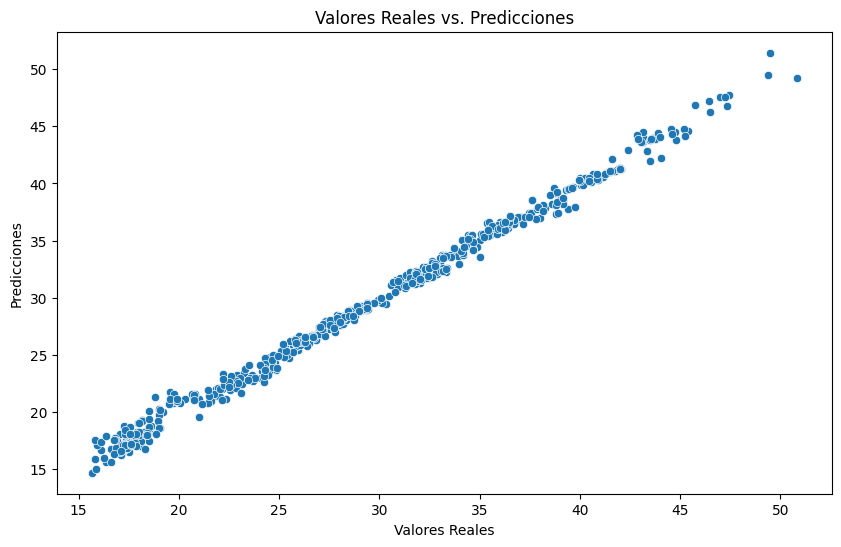

In [22]:
# Creamos un DataFrame con las predicciones
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

# Graficamos valores reales vs predicciones
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results, legend='full')
plt.title('Valores Reales vs. Predicciones')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()

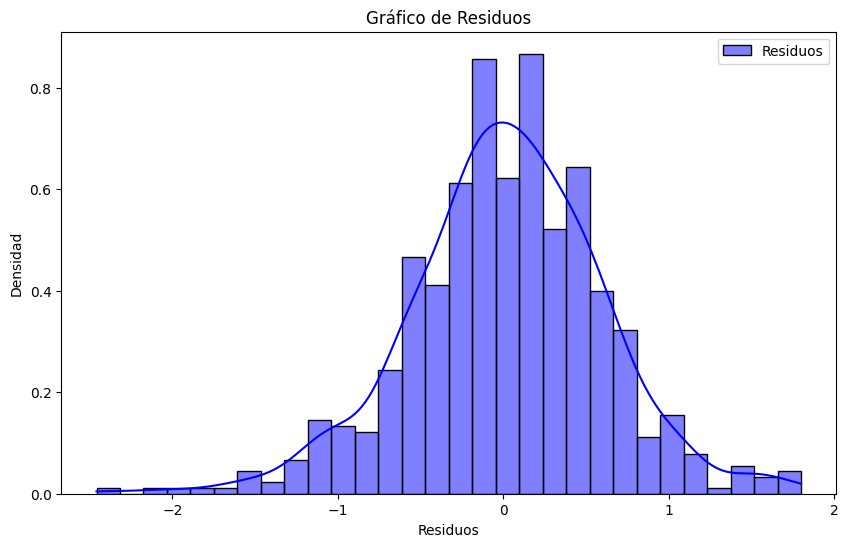

In [23]:
# Calculamos los residuos
residuals = y_test - predictions

# Creamos un gráfico de residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color='blue', stat='density', label='Residuos')

plt.title('Gráfico de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Densidad')
plt.legend()
plt.show()

In [24]:
# Evaluamos el rendimiento del modelo con métricas de regresión
from sklearn import metrics

print('Error absoluto medio', metrics.mean_absolute_error(y_test, predictions))
print('Error cuadrático medio', metrics.mean_squared_error(y_test, predictions))
print('Raíz error cuadrático medio', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Error absoluto medio 0.4510782819344354
Error cuadrático medio 0.34800343068321055
Raíz error cuadrático medio 0.5899181559192855


In [25]:
# Evaluamos el coeficiente de determinación R2
print('R-squared (R2):', metrics.r2_score(y_test, predictions))

R-squared (R2): 0.9947611188380356


## **Utilizamos backward para determinar una regresión lineal múltiple con menos variables**

In [26]:
import statsmodels.api as sm # Proporciona herramientas para ajustar modelos estadísticos.
from sklearn.preprocessing import OneHotEncoder # Se utiliza para codificar variables categóricas en one-hot encoding.

# Creamos una copia de seguridad para no modificar el DataFrame original
data = obesity.copy()

# Separar la variable objetivo y las variables predictoras
X = data.drop(columns=['Mass_Body_Index'])  # Excluir la variable objetivo
y = data['Mass_Body_Index']

# Codificar las variables categóricas utilizando One-Hot Encoding
categorical_columns = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Usar drop ='first' para evitar multicolinealidad
X_encoded = encoder.fit_transform(X[categorical_columns])

# Generar manualmente los nombres de las características para las columnas codificadas
encoded_feature_names = []
for cat_column in categorical_columns:
    unique_categories = data[cat_column].unique()
    for category in unique_categories[1:]:  # Empezar desde el segundo valor para evitar multicolinealidad
        encoded_feature_names.append(f'{cat_column}_{category}')

# Crear un DataFrame con las columnas codificadas y los nombres de las características
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names)

# Combinar el DataFrame codificado con las variables numéricas
X = pd.concat([X.drop(columns=categorical_columns), X_encoded_df], axis=1)

# Iniciar el proceso de eliminación hacia atrás
while True:
    # Añadir una constante (intercepto) al conjunto de datos
    X = sm.add_constant(X)

    # Ajustar el modelo de regresión lineal
    modelo = sm.OLS(y, X).fit()

    # Obtener las p-values de las variables
    p_values = modelo.pvalues

    # Encontrar la variable con el mayor p-value
    variable_menos_significativa = p_values.idxmax()

    # Comprobar si la variable menos significativa tiene un p-value mayor que un umbral (por ejemplo, 0.05)
    if p_values[variable_menos_significativa] > 0.05:
        # Eliminar la variable menos significativa del conjunto de datos
        X = X.drop(columns=[variable_menos_significativa], axis=1)
    else:
        # Si todas las variables son significativas, salir del bucle
        break

# Resumen del modelo resultante
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:        Mass_Body_Index   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 2.072e+04
Date:                Sun, 22 Oct 2023   Prob (F-statistic):               0.00
Time:                        00:29:30   Log-Likelihood:                -1799.1
No. Observations:                2111   AIC:                             3640.
Df Residuals:                    2090   BIC:                             3759.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

## **Determinar la multicolinealidad del modelo** (utilizamos solo las variables numéricas)

In [27]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Utilizamos todas las variables numéricas del dataframe
X = obesity.select_dtypes(include=['float64'])

# Agregamos una constante al conjunto de datos para calcular el intercepto
X = sm.add_constant(X)

# Calculamos los VIF para cada variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Establecemos un umbral para detectar multicolinealidad
umbral_multicolinealidad = 5.0

# Mostramos el resultado con los VIF
print(vif)

# Evaluamos si alguna variable tiene multicolinealidad
variables_multicolineales = vif[vif["VIF"] > umbral_multicolinealidad]
if not variables_multicolineales.empty:
    print("Variables con multicolinealidad:")
    print(variables_multicolineales)
else:
    print("No se encontraron variables con multicolinealidad.")

                                 Variable          VIF
0                                   const  5106.775318
1                                     Age     1.184616
2                                  Height    15.805961
3                                  Weight   121.053034
4  Frequency of consumption of vegetables     1.111903
5                    Number of main meals     1.093817
6              Consumption of water daily     1.091517
7             Physical activity frequency     1.207071
8           Time using technology devices     1.111650
9                         Mass_Body_Index    98.055454
Variables con multicolinealidad:
          Variable          VIF
0            const  5106.775318
2           Height    15.805961
3           Weight   121.053034
9  Mass_Body_Index    98.055454


## **Determinar la homocedasticidad del modelo** (utilizamos solo las variables numéricas)

##### Utilizando el método de Breusch-Pagan

In [28]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Utilizamos todas las variables numéricas del dataframe
X = obesity[['Age', 'Height', 'Weight', 'Frequency of consumption of vegetables', 'Number of main meals',
       'Consumption of water daily', 'Physical activity frequency', 'Time using technology devices']]
y = obesity['Mass_Body_Index']

# Ajustar un modelo de regresión lineal
X = sm.add_constant(X)
modelo = sm.OLS(y, X).fit()

# Realizar la prueba de Breusch-Pagan
_, p_value, _, _ = het_breuschpagan(modelo.resid, X)
print(f'P-valor de la prueba de Breusch-Pagan: {p_value}')

# Evaluar el p-valor para la homocedasticidad
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print('La prueba de homocedasticidad sugiere heterocedasticidad (no homocedasticidad).')
else:
    print('La prueba de homocedasticidad no sugiere heterocedasticidad (homocedasticidad).')


P-valor de la prueba de Breusch-Pagan: 3.7465824800564113e-41
La prueba de homocedasticidad sugiere heterocedasticidad (no homocedasticidad).


##### Utilizando el método de Levene

In [29]:
from scipy.stats import levene

# Utilizamos todas las variables numéricas del dataframe
X = obesity[['Age', 'Height', 'Weight', 'Frequency of consumption of vegetables', 'Number of main meals',
       'Consumption of water daily', 'Physical activity frequency', 'Time using technology devices']]

# Realizar la prueba de Levene
statistic, p_value = levene(*[X[col] for col in X.columns])

print(f'Estadístico de Levene: {statistic}')
print(f'P-valor de Levene: {p_value}')

# Evaluar el p-valor para la homocedasticidad
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print('La prueba de homocedasticidad de Levene sugiere heterocedasticidad (no homocedasticidad).')
else:
    print('La prueba de homocedasticidad de Levene no sugiere heterocedasticidad (homocedasticidad).')

Estadístico de Levene: 3722.8097688419907
P-valor de Levene: 0.0
La prueba de homocedasticidad de Levene sugiere heterocedasticidad (no homocedasticidad).


##### Utilizando el método de Bartlett y el método de Flinger

In [30]:
from scipy.stats import bartlett, fligner

# Utilizamos todas las variables numéricas del dataframe
X = obesity[['Age', 'Height', 'Weight', 'Frequency of consumption of vegetables', 'Number of main meals',
       'Consumption of water daily', 'Physical activity frequency', 'Time using technology devices']]

# Realizar la prueba de Bartlett
statistic_bartlett, p_value_bartlett = bartlett(*[X[col] for col in X.columns])

# Realizar la prueba de Fligner-Killeen
statistic_fligner, p_value_fligner = fligner(*[X[col] for col in X.columns])

print(f'Estadístico de Bartlett: {statistic_bartlett}')
print(f'P-valor de Bartlett: {p_value_bartlett}')

print(f'Estadístico de Fligner-Killeen: {statistic_fligner}')
print(f'P-valor de Fligner-Killeen: {p_value_fligner}')

# Evaluar los p-valores para la homocedasticidad
alpha = 0.05  # Nivel de significancia

if p_value_bartlett < alpha:
    print('La prueba de homocedasticidad de Bartlett sugiere heterocedasticidad (no homocedasticidad).')
else:
    print('La prueba de homocedasticidad de Bartlett no sugiere heterocedasticidad (homocedasticidad).')

if p_value_fligner < alpha:
    print('La prueba de homocedasticidad de Fligner-Killeen sugiere heterocedasticidad (no homocedasticidad).')
else:
    print('La prueba de homocedasticidad de Fligner-Killeen no sugiere heterocedasticidad (homocedasticidad).')

Estadístico de Bartlett: 73125.0653017324
P-valor de Bartlett: 0.0
Estadístico de Fligner-Killeen: 11275.411247916252
P-valor de Fligner-Killeen: 0.0
La prueba de homocedasticidad de Bartlett sugiere heterocedasticidad (no homocedasticidad).
La prueba de homocedasticidad de Fligner-Killeen sugiere heterocedasticidad (no homocedasticidad).


## **Determinar la normalidad de los residuos**

#### Utilizamos el test de shapiro wilk

In [31]:
from scipy.stats import shapiro

# Utilizamos todas las variables numéricas del dataframe
columnas = obesity.select_dtypes(include=['float64'])

variables_normales = []

for columna in columnas:
    statistic, p_value = shapiro(obesity[columna])

    alpha = 0.05  # Nivel de significancia

    if p_value > alpha:
        variables_normales.append(columna)

    print(f'Variable: {columna}')
    print(f'Estadístico de Shapiro-Wilk: {statistic}')
    print(f'P-valor: {p_value}')

    # Imprimir el resultado
    if p_value > alpha:
        variables_normales.append(columna)
        print(f'El p-valor es mayor que {alpha}, lo que sugiere que la variable sigue una distribución normal.')
    else:
        print(f'El p-valor es menor que {alpha}, por lo que la variable no sigue una distribución normal.')
    print("\n")
print('Variables con distribución normal:')
print(variables_normales)

Variable: Age
Estadístico de Shapiro-Wilk: 0.8660658001899719
P-valor: 3.519136885397486e-39
El p-valor es menor que 0.05, por lo que la variable no sigue una distribución normal.


Variable: Height
Estadístico de Shapiro-Wilk: 0.9932353496551514
P-valor: 2.7788857437371917e-08
El p-valor es menor que 0.05, por lo que la variable no sigue una distribución normal.


Variable: Weight
Estadístico de Shapiro-Wilk: 0.9764996767044067
P-valor: 3.766832030646535e-18
El p-valor es menor que 0.05, por lo que la variable no sigue una distribución normal.


Variable: Frequency of consumption of vegetables
Estadístico de Shapiro-Wilk: 0.8449125289916992
P-valor: 2.437698808539452e-41
El p-valor es menor que 0.05, por lo que la variable no sigue una distribución normal.


Variable: Number of main meals
Estadístico de Shapiro-Wilk: 0.7409628629684448
P-valor: 0.0
El p-valor es menor que 0.05, por lo que la variable no sigue una distribución normal.


Variable: Consumption of water daily
Estadístico 

#### Utilizamos el test de Anderson

In [32]:
from scipy.stats import anderson

# Utilizamos todas las variables numéricas del dataframe
columnas = obesity.select_dtypes(include=['float64'])
variables_normales = []

for columna in columnas:
    result = anderson(obesity[columna], dist='norm')
    statistic = result.statistic
    critical_values = result.critical_values
    alpha = 0.05  # Nivel de significancia

    p_value = result.significance_level  # Obtener el p-valor

    print(f'Variable: {columna}')
    print(f'Estadístico de Anderson-Darling: {statistic}')
    print(f'Valores críticos: {critical_values}')
    print(f'P-valor: {p_value}')

    # Imprimir el resultado
    if all(statistic < critical_values):
        variables_normales.append(columna)
        if p_value < alpha:
            print(f'El p-valor es menor que {alpha}, por lo que la variable sigue una distribución normal.')
        else:
            print(f'El p-valor es mayor que {alpha}, lo que sugiere que la variable sigue una distribución normal.')
    else:
        print(f'El estadístico de Anderson-Darling es mayor que los valores críticos, lo que sugiere que la variable no sigue una distribución normal.')
    print("\n")

print('Variables con distribución normal:')
print(variables_normales)

Variable: Age
Estadístico de Anderson-Darling: 80.91845438437667
Valores críticos: [0.575 0.655 0.786 0.916 1.09 ]
P-valor: [15.  10.   5.   2.5  1. ]
El estadístico de Anderson-Darling es mayor que los valores críticos, lo que sugiere que la variable no sigue una distribución normal.


Variable: Height
Estadístico de Anderson-Darling: 4.198715712269404
Valores críticos: [0.575 0.655 0.786 0.916 1.09 ]
P-valor: [15.  10.   5.   2.5  1. ]
El estadístico de Anderson-Darling es mayor que los valores críticos, lo que sugiere que la variable no sigue una distribución normal.


Variable: Weight
Estadístico de Anderson-Darling: 13.431049792187878
Valores críticos: [0.575 0.655 0.786 0.916 1.09 ]
P-valor: [15.  10.   5.   2.5  1. ]
El estadístico de Anderson-Darling es mayor que los valores críticos, lo que sugiere que la variable no sigue una distribución normal.


Variable: Frequency of consumption of vegetables
Estadístico de Anderson-Darling: 130.69007924649532
Valores críticos: [0.575 0.6

## **Prueba de autocorrelación utilizando prueba de hipótesis**

In [33]:
import statsmodels.api as sm

# Copia de seguridad para no modificar el DataFrame original
data = obesity.copy()

# Seleccionar las columnas de interés (tipo numéricas)
columnas = data.select_dtypes(include=['float64'])

# Realizar la prueba de autocorrelación para cada columna
for columna in columnas:
    y = data[columna]
    X = data[columna].shift(1)  # Crear una columna con el valor en el lag 1

    # Eliminar filas con valores NaN
    y = y[1:]
    X = X[1:]

    X = sm.add_constant(X)  # Añadir una constante

    modelo = sm.OLS(y, X).fit()

    # Realizar una prueba de hipótesis de Durbin-Watson para detectar autocorrelación
    dw_test = sm.stats.stattools.durbin_watson(modelo.resid)

    # Imprimir el resultado
    print(f"Variable: {columna}")
    print(f"Estadístico Durbin-Watson: {dw_test}")
    if dw_test > 1.5 and dw_test < 2.5:
        print("No se encuentra evidencia de autocorrelación.")
    else:
        print("Evidencia de posible autocorrelación.")
    print("\n")


Variable: Age
Estadístico Durbin-Watson: 2.0350277353706603
No se encuentra evidencia de autocorrelación.


Variable: Height
Estadístico Durbin-Watson: 2.0167068631429106
No se encuentra evidencia de autocorrelación.


Variable: Weight
Estadístico Durbin-Watson: 2.4260404229628385
No se encuentra evidencia de autocorrelación.


Variable: Frequency of consumption of vegetables
Estadístico Durbin-Watson: 2.1439458842696757
No se encuentra evidencia de autocorrelación.


Variable: Number of main meals
Estadístico Durbin-Watson: 2.0517771418019746
No se encuentra evidencia de autocorrelación.


Variable: Consumption of water daily
Estadístico Durbin-Watson: 2.048247086683776
No se encuentra evidencia de autocorrelación.


Variable: Physical activity frequency
Estadístico Durbin-Watson: 2.033211973873665
No se encuentra evidencia de autocorrelación.


Variable: Time using technology devices
Estadístico Durbin-Watson: 2.028162918875238
No se encuentra evidencia de autocorrelación.


Variable